In [1]:
import tensorflow as tf
import numpy as np
from keras.datasets import fashion_mnist

import matplotlib.pyplot as plt

In [2]:
(x_train_data, t_train_data),(x_test_data, t_test_data) = fashion_mnist.load_data()

<function matplotlib.pyplot.show(close=None, block=None)>

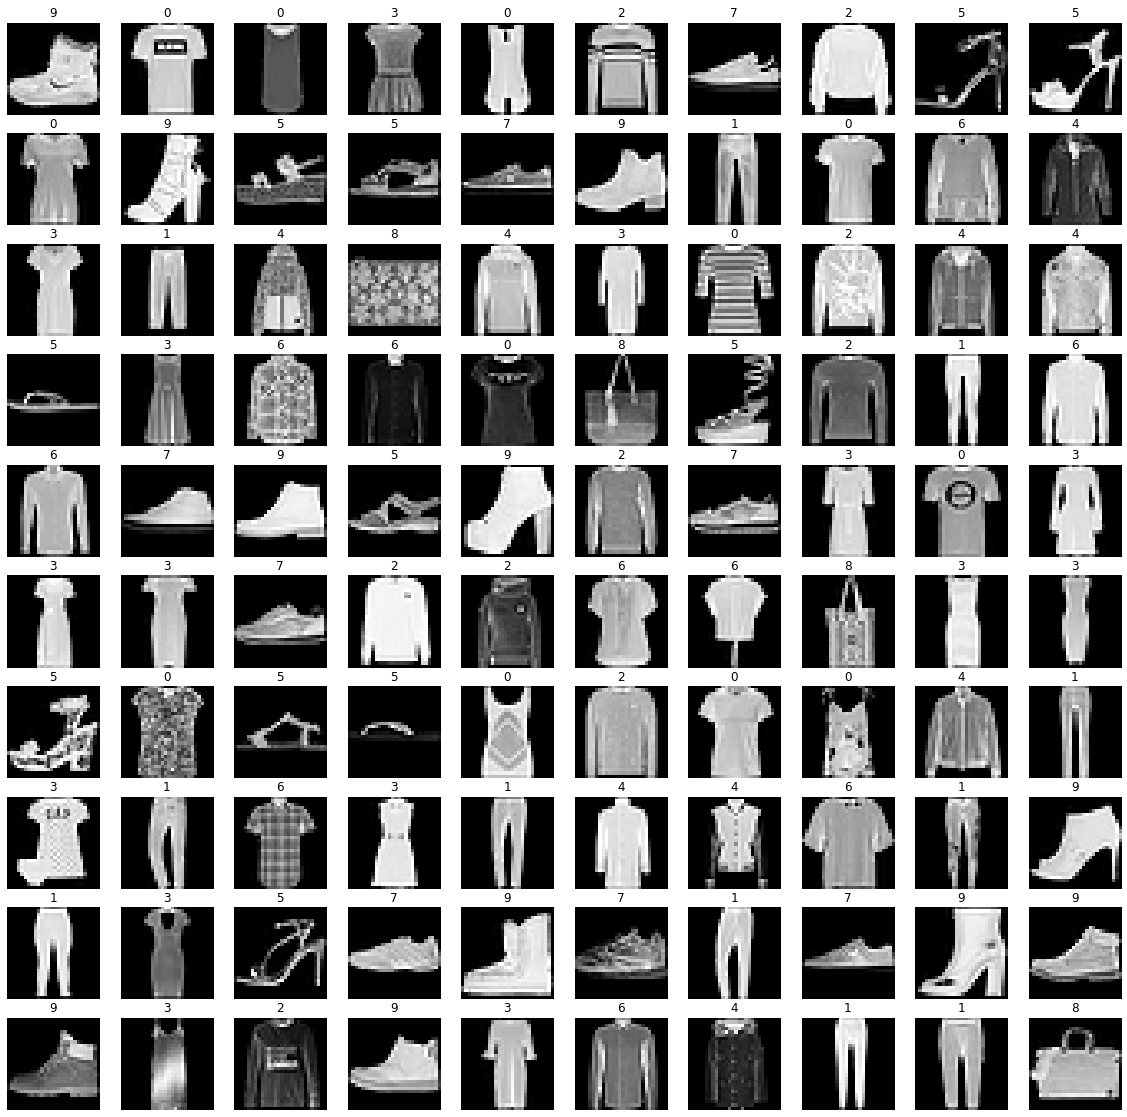

In [3]:
plt.figure(figsize=(20,20))

for index in range(0,100,1):
    plt.subplot(10,10,index+1)
    plt.imshow(x_train_data[index], cmap='gray')
    plt.axis('off')
    plt.title(str(t_train_data[index]))


plt.show

In [4]:
x_train = (x_train_data - 0.0)/(255.0 -0.0)
x_test = (x_test_data - 0.0)/(255.0 -0.0)

In [5]:
# One Hot encoding
t_train = tf.keras.utils.to_categorical(t_train_data, num_classes=10)
t_test = tf.keras.utils.to_categorical(t_test_data, num_classes=10)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model=Sequential()
model.add(Flatten(input_shape=(28,28))) #Flatten : 일차원
model.add(Dense(100, activation='relu')) # 은닉층?? 100개
model.add(Dense(10,activation='softmax')) # 출력층 10개

In [7]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate = 1e-4),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [8]:
hist=model.fit(x_train, t_train, epochs = 50, validation_split = 0.3)

Epoch 1/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.8112 - accuracy: 0.7464 - val_loss: 0.5713 - val_accuracy: 0.8136
Epoch 2/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5196 - accuracy: 0.8282 - val_loss: 0.4912 - val_accuracy: 0.8352
Epoch 3/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4650 - accuracy: 0.8430 - val_loss: 0.4595 - val_accuracy: 0.8417
Epoch 4/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4363 - accuracy: 0.8518 - val_loss: 0.4356 - val_accuracy: 0.8497
Epoch 5/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4165 - accuracy: 0.8565 - val_loss: 0.4230 - val_accuracy: 0.8556
Epoch 6/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3998 - accuracy: 0.8627 - val_loss: 0.4091 - val_accuracy: 0.8581
Epoch 7/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3875 - accuracy: 0.8654 - val_loss: 0.4036 - val_accuracy:

In [9]:
predictions = model.predict(x_test)

313/313 [==============================] - 0s 702us/step


In [10]:
print(predictions[0])
print(t_test[0])

[3.3210338e-07 1.4253412e-10 7.4749673e-06 4.9709847e-06 1.3077398e-06
 1.4881160e-02 3.7898924e-06 2.5829066e-02 1.9666656e-04 9.5907521e-01]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [11]:
label=np.argmax(predictions[0])
print(label)

9


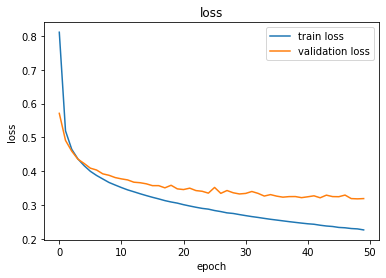

In [12]:
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best') # 범례를 최적의 위치에 알아서 위치시켜줌
plt.show()

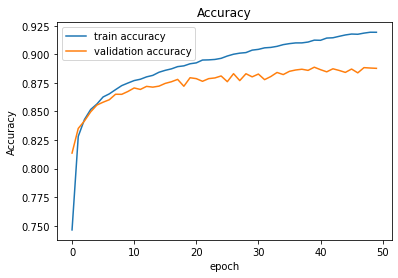

In [13]:
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'],label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best') # 범례를 최적의 위치에 알아서 위치시켜줌
plt.show()

[[815   1  17  38   6   0 111   0  12   0]
 [  1 968   0  24   3   0   4   0   0   0]
 [ 10   0 759  16 110   1 101   0   3   0]
 [ 15  11  12 901  32   0  23   0   6   0]
 [  0   0  73  40 809   0  73   0   5   0]
 [  1   0   0   1   0 953   0  27   3  15]
 [109   1  72  45  65   0 696   0  12   0]
 [  0   0   0   0   0  21   0 950   1  28]
 [  5   0   5   6   3   2   9   4 965   1]
 [  0   0   0   0   0  10   1  36   0 953]]


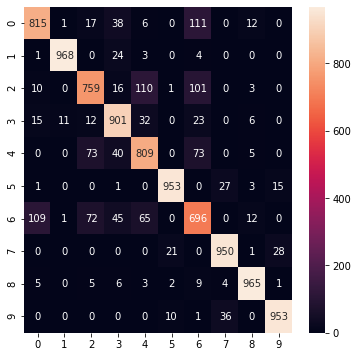

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6,6))
cm = confusion_matrix(np.argmax(t_test, axis=-1),
                     np.argmax(predictions, axis= -1))
print(cm)
print('='*50)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()